<a target="_blank" href="https://colab.research.google.com/github/Sebelino/DD2424-project/blob/main/e1_sebastian.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
%load_ext autoreload
%autoreload 2

import os
import socket

repo_name = "DD2424-project"
dep_filename = "download_dataset.py"
cwd = os.getcwd()
hostname = socket.gethostname()

print(f"Host: {hostname}")
print(f"You are here: {cwd}")

if os.path.exists(dep_filename):
    print(f"{dep_filename} is in your current directory. Assuming you are in the root of the repository.")
elif not os.path.exists(repo_name):
    print(f"Cloning repo and fetching {dep_filename}...")
    !git clone https://github.com/Sebelino/DD2424-project
    !cp DD2424-project/download_dataset.py .
else:
    !git -C DD2424-project pull --rebase
    !cp DD2424-project/download_dataset.py .

Host: deeplearning-vm
You are here: /home/sebelino/pycharm_deployment
download_dataset.py is in your current directory. Assuming you are in the root of the repository.


In [2]:
from determinism import Determinism

determinism = Determinism(seed=42).sow()  # Keep this before any torch import
print("Training results should now be reproducible.")


Training results should now be reproducible.


# Train model

Training with params:
{
  "seed": 42,
  "architecture": "resnet50",
  "optimizer": {
    "learning_rate": 0.022630885203465553,
    "weight_decay": 8.478660307897792e-05,
    "momentum": 0.8063799868511693,
    "name": "nag"
  },
  "n_epochs": 10,
  "freeze_layers": true,
  "unfreezing_epochs": [2, 4],
  "validation_freq": 1
}
Training result:
{
  "training_losses": [2.2249085187911986, 0.4737040624022484, 0.11672895550727844, 0.07026473488658666, 0.03459322676062584, 0.03266140520572662, 0.01775884605012834, 0.021444569365121423, 0.012848430755548179, 0.008020076900720596],
  "training_accuracies": [0.6625, 0.93125, 0.98125, 0.9875, 0.996875, 0.996875, 0.996875, 0.99375, 1.0, 1.0],
  "validation_accuracies": [0.95, 0.9875, 0.975, 0.9875, 0.975, 0.975, 0.9875, 1.0, 1.0, 1.0],
  "update_steps": [11, 21, 31, 41, 51, 61, 71, 81, 91, 101],
  "epochs": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  "training_elapsed": 17.59715237600176
}


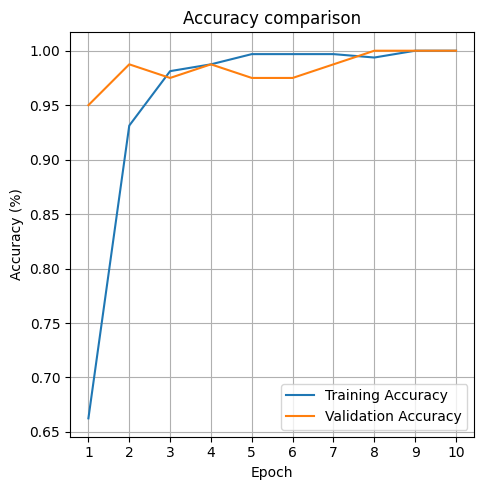

In [3]:
%reload_ext autoreload
%autoreload 2

from training import TrainParams, NagParams, AdamParams
from evaluation import evaluate_test_accuracy_and_misclassified, \
    evaluate_with_train_val_plot, run_with_different_seeds, run_comparison
from run import run
from caching import invalidate_cache_entry
from datasets import DatasetParams

dataset_params = DatasetParams(
    splitting_seed=determinism.seed,
    shuffler_seed=determinism.seed,
    batch_size=32,
    #trainval_size=None,  # Load all training data
    trainval_size=400,  # Load a subset
    validation_set_fraction=0.2,  # 20 % of trainval set
)

baseline_params = TrainParams(
    seed=determinism.seed,
    architecture="resnet50",
    n_epochs=10,
    optimizer=NagParams(
        learning_rate=0.01,
        weight_decay=1e-4,
        momentum=0.9,
    ),
    freeze_layers=True,
    unfreezing_epochs=(3, 6),
    validation_freq=1,
    time_limit_seconds=None,
    val_acc_target=None,
)

baseline_params = TrainParams(
    seed=determinism.seed,
    architecture="resnet50",
    n_epochs=10,
    optimizer=NagParams(
        learning_rate=0.022630885203465553,
        weight_decay=8.478660307897792e-05,
        momentum=0.8063799868511693,
    ),
    freeze_layers=True,
    unfreezing_epochs=(2, 4),
    validation_freq=1,
    time_limit_seconds=None,
    val_acc_target=None,
)

run_args = (dataset_params, baseline_params)

# Set invalidate=True to invalidate a single cache entry
invalidate_cache_entry(run, run_args, invalidate=False)

# First plot: Training and validation accuracy
print("Training with params:")
print(baseline_params.pprint())
result = run(*run_args)

print("Training result:")
print(result.pprint())
evaluate_with_train_val_plot(result)

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch [1/10], Loss: 2.2136, Train Acc: 66.25%, Val Acc: 98.75%
Epoch [2/10], Loss: 0.4664, Train Acc: 92.81%, Val Acc: 98.75%
Epoch [3/10], Loss: 0.1172, Train Acc: 98.75%, Val Acc: 98.75%
Epoch [4/10], Loss: 0.0687, Train Acc: 99.06%, Val Acc: 98.75%
Epoch [5/10], Loss: 0.0332, Train Acc: 99.69%, Val Acc: 100.00%
Epoch [6/10], Loss: 0.0326, Train Acc: 99.69%, Val Acc: 98.75%
Epoch [7/10], Loss: 0.0176, Train Acc: 99.69%, Val Acc: 98.75%
Epoch [8/10], Loss: 0.0228, Train Acc: 99.38%, Val Acc: 100.00%
Epoch [9/10], Loss: 0.0133, Train Acc: 99.69%, Val Acc: 100.00%
Epoch [10/10], Loss: 0.0080, Train Acc: 100.00%, Val Acc: 100.00%
Elapsed for all epochs: 17.55s, average per epoch: 1.66s, average per batch: 0.11s


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch [1/10], Loss: 2.2325, Train Acc: 64.69%, Val Acc: 96.25%
Epoch [2/10], Loss: 0.4784, Train Acc: 92.81%, Val Acc: 98.75%
Epoch [3/10], Loss: 0.1220, Train Acc: 98.12%, Val Acc: 97.50%
Epoch [4/10], Loss: 0.0705, Train Acc: 99.06%, Val Acc: 98.75%
Epoch [5/10], Loss: 0.0346, Train Acc: 99.69%, Val Acc: 97.50%
Epoch [6/10], Loss: 0.0321, Train Acc: 99.69%, Val Acc: 98.75%
Epoch [7/10], Loss: 0.0175, Train Acc: 99.69%, Val Acc: 98.75%
Epoch [8/10], Loss: 0.0224, Train Acc: 99.38%, Val Acc: 100.00%
Epoch [9/10], Loss: 0.0134, Train Acc: 99.69%, Val Acc: 100.00%
Epoch [10/10], Loss: 0.0081, Train Acc: 100.00%, Val Acc: 100.00%
Elapsed for all epochs: 16.95s, average per epoch: 1.62s, average per batch: 0.10s


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch [1/10], Loss: 2.2309, Train Acc: 65.62%, Val Acc: 95.00%
Epoch [2/10], Loss: 0.4762, Train Acc: 92.81%, Val Acc: 98.75%
Epoch [3/10], Loss: 0.1182, Train Acc: 98.12%, Val Acc: 98.75%
Epoch [4/10], Loss: 0.0719, Train Acc: 98.75%, Val Acc: 98.75%
Epoch [5/10], Loss: 0.0348, Train Acc: 99.69%, Val Acc: 100.00%
Epoch [6/10], Loss: 0.0320, Train Acc: 99.69%, Val Acc: 98.75%
Epoch [7/10], Loss: 0.0170, Train Acc: 99.69%, Val Acc: 98.75%
Epoch [8/10], Loss: 0.0226, Train Acc: 99.38%, Val Acc: 100.00%
Epoch [9/10], Loss: 0.0135, Train Acc: 99.69%, Val Acc: 100.00%
Epoch [10/10], Loss: 0.0085, Train Acc: 100.00%, Val Acc: 100.00%
Elapsed for all epochs: 16.87s, average per epoch: 1.60s, average per batch: 0.11s


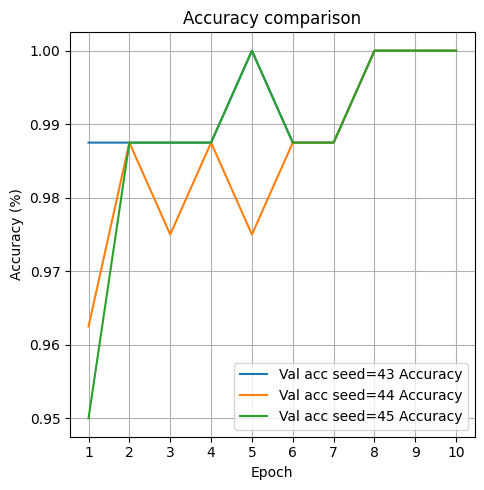

Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch [1/10], Loss: 2.6296, Train Acc: 35.31%, Val Acc: 68.75%
Epoch [2/10], Loss: 0.7626, Train Acc: 83.44%, Val Acc: 92.50%
Epoch [3/10], Loss: 0.1323, Train Acc: 97.19%, Val Acc: 88.75%
Epoch [4/10], Loss: 0.2108, Train Acc: 95.62%, Val Acc: 66.25%
Epoch [5/10], Loss: 0.2295, Train Acc: 92.81%, Val Acc: 80.00%
Epoch [6/10], Loss: 0.2452, Train Acc: 93.12%, Val Acc: 83.75%
Epoch [7/10], Loss: 0.1353, Train Acc: 96.88%, Val Acc: 85.00%
Epoch [8/10], Loss: 0.1084, Train Acc: 98.44%, Val Acc: 81.25%
Epoch [9/10], Loss: 0.0636, Train Acc: 98.75%, Val Acc: 86.25%
Epoch [10/10], Loss: 0.0589, Train Acc: 98.75%, Val Acc: 85.00%
Elapsed for all epochs: 16.96s, average per epoch: 1.63s, average per batch: 0.10s


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch [1/10], Loss: 2.6218, Train Acc: 39.06%, Val Acc: 72.50%
Epoch [2/10], Loss: 0.7676, Train Acc: 83.44%, Val Acc: 92.50%
Epoch [3/10], Loss: 0.1239, Train Acc: 97.50%, Val Acc: 95.00%
Epoch [4/10], Loss: 0.2220, Train Acc: 94.06%, Val Acc: 88.75%
Epoch [5/10], Loss: 0.2332, Train Acc: 94.69%, Val Acc: 81.25%
Epoch [6/10], Loss: 0.1637, Train Acc: 95.31%, Val Acc: 85.00%
Epoch [7/10], Loss: 0.1129, Train Acc: 97.50%, Val Acc: 82.50%
Epoch [8/10], Loss: 0.1728, Train Acc: 97.19%, Val Acc: 85.00%
Epoch [9/10], Loss: 0.0746, Train Acc: 98.44%, Val Acc: 78.75%
Epoch [10/10], Loss: 0.0201, Train Acc: 99.38%, Val Acc: 91.25%
Elapsed for all epochs: 16.88s, average per epoch: 1.64s, average per batch: 0.10s


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch [1/10], Loss: 2.5938, Train Acc: 47.81%, Val Acc: 83.75%
Epoch [2/10], Loss: 0.7528, Train Acc: 85.31%, Val Acc: 93.75%
Epoch [3/10], Loss: 0.1314, Train Acc: 97.50%, Val Acc: 96.25%
Epoch [4/10], Loss: 0.2811, Train Acc: 93.12%, Val Acc: 73.75%
Epoch [5/10], Loss: 0.2764, Train Acc: 92.50%, Val Acc: 86.25%
Epoch [6/10], Loss: 0.2306, Train Acc: 93.12%, Val Acc: 82.50%
Epoch [7/10], Loss: 0.0791, Train Acc: 98.44%, Val Acc: 90.00%
Epoch [8/10], Loss: 0.0649, Train Acc: 99.06%, Val Acc: 92.50%
Epoch [9/10], Loss: 0.0859, Train Acc: 98.44%, Val Acc: 87.50%
Epoch [10/10], Loss: 0.0780, Train Acc: 98.44%, Val Acc: 90.00%
Elapsed for all epochs: 17.16s, average per epoch: 1.63s, average per batch: 0.11s


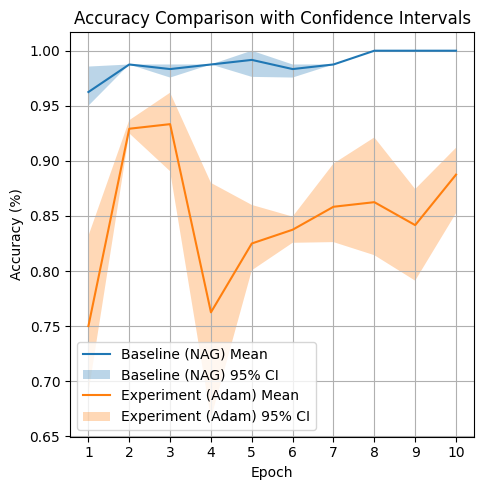

In [4]:
# Second plot: Rerun training multiple times with different seed
run_with_different_seeds(dataset_params, baseline_params, trials=3)

# Third plot: Compare NAG with Adam
experimental_params = baseline_params.copy()
experimental_params.optimizer = AdamParams(
    learning_rate=0.001,
    weight_decay=1e-4,
)

param_sets = {
    "Baseline (NAG)": baseline_params,
    "Experiment (Adam)": experimental_params,
}
run_comparison(dataset_params, param_sets, trials=3)


# Test model

Training with params:
{
  "seed": 42,
  "architecture": "resnet50",
  "optimizer": {
    "learning_rate": 0.022630885203465553,
    "weight_decay": 8.478660307897792e-05,
    "momentum": 0.8063799868511693,
    "name": "nag"
  },
  "n_epochs": 10,
  "freeze_layers": true,
  "unfreezing_epochs": [2, 4],
  "validation_freq": 1
}


Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Batch:   0%|          | 0/10 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/3 [00:00<?, ?it/s]

Epoch [1/10], Loss: 2.2129, Train Acc: 63.75%, Val Acc: 96.25%
Epoch [2/10], Loss: 0.4742, Train Acc: 93.44%, Val Acc: 98.75%
Epoch [3/10], Loss: 0.1183, Train Acc: 97.81%, Val Acc: 98.75%
Epoch [4/10], Loss: 0.0706, Train Acc: 99.06%, Val Acc: 100.00%
Epoch [5/10], Loss: 0.0333, Train Acc: 99.69%, Val Acc: 100.00%
Epoch [6/10], Loss: 0.0333, Train Acc: 99.69%, Val Acc: 98.75%
Epoch [7/10], Loss: 0.0170, Train Acc: 99.69%, Val Acc: 98.75%
Epoch [8/10], Loss: 0.0233, Train Acc: 99.38%, Val Acc: 100.00%
Epoch [9/10], Loss: 0.0135, Train Acc: 99.69%, Val Acc: 100.00%
Epoch [10/10], Loss: 0.0088, Train Acc: 100.00%, Val Acc: 100.00%
Elapsed for all epochs: 17.12s, average per epoch: 1.65s, average per batch: 0.10s
Test size: 3669


Evaluating:   0%|          | 0/115 [00:00<?, ?it/s]

Final Test Accuracy: 20.41%
Number of misclassified samples: 2920


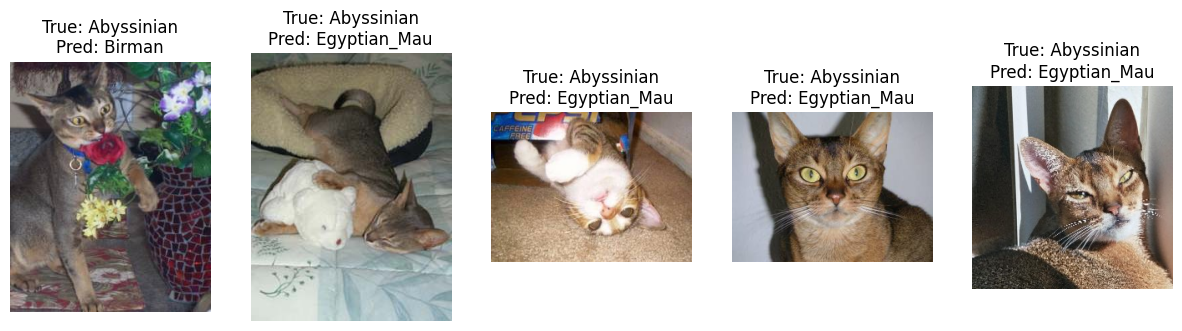

Copied 2920 misclassified images to ./misclassified


In [5]:
from datasets import make_datasets
from torch.utils.data import DataLoader
from training import Trainer
from datasets import load_dataset

training_params = baseline_params

print("Training with params:")
print(training_params.pprint())
trainer = Trainer(training_params)
train_loader, val_loader = make_datasets(dataset_params, trainer.transform)
trainer.train(train_loader, val_loader)

test_dataset = load_dataset("test", Trainer.make_transform(training_params))
test_loader = DataLoader(
    test_dataset,
    batch_size=dataset_params.batch_size,
    shuffle=False,
    num_workers=3,
    worker_init_fn=Determinism.data_loader_worker_init_fn(training_params.seed),
)
print(f"Test size: {len(test_loader.dataset)}")

evaluate_test_accuracy_and_misclassified(trainer, test_loader, test_dataset)
